<a href="https://colab.research.google.com/github/KoshiBG/Python_for_data_analysis/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data_path = '../content/drive/MyDrive/code/data/yulu_rental.csv'
df = pd.read_csv(data_path)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [4]:
import seaborn as sns

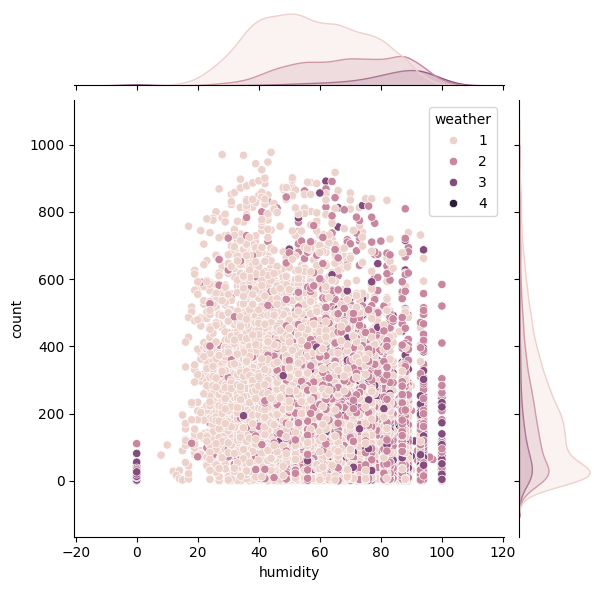

In [5]:
sns.jointplot(df, x="humidity", y="count", hue="weather");

1. Найбільша концентрація значень, count припадає на  позначку погоди з найкращими погодними умовами. З погіршенням умов кількість падає. Можна передбачити підвищений попит у дні з хорошою погодою. Це допоможе оптимізувати кількість доступних велосипедів або інших ресурсів, щоб задовольнити очікуваний попит.

2. Активність користувачів незначно знижується при дуже високій вологості (80%+), хоча помітно, що при будь-якому рівні вологості активність зареєстрованих користувачів все одно є.

3. По краях графіка видно щільніші розподіли даних, що також відображено у вигляді лінійної щільності (зверху і праворуч). Це допомагає зрозуміти, що найбільша кількість даних зосереджена при вологості 50-70%, а кількість користувачів частіше спостерігається на рівні від 100 до 600.


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [6]:
spring_summer_data = df[df['season'].isin([1, 2])]


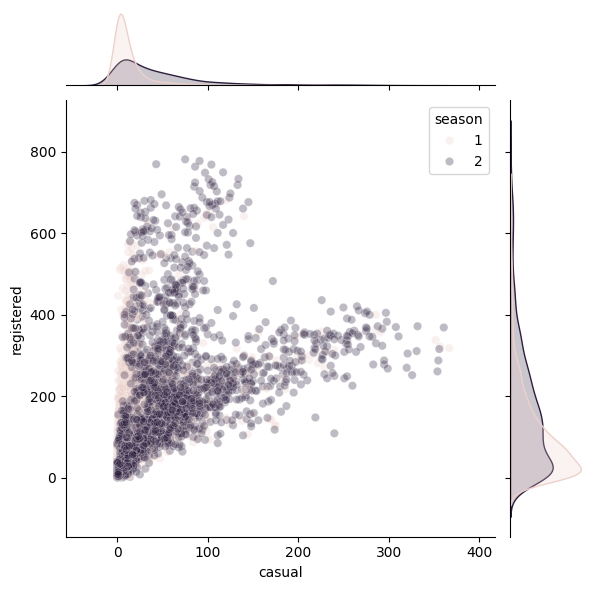

In [7]:
sns.jointplot(spring_summer_data, x="casual", y="registered", hue="season", alpha=.3);

Оскільки літній період має більше випадкових користувачів, варто звернути увагу на просування або розвиток сервісу саме в цей час, щоб привабити більше нових користувачів і стимулювати підписки.

1. Стратегії залучення випадкових користувачів:
Якщо більше випадкових користувачів використовують сервіс, коли зареєстрованих менше, можна розробити спеціальні маркетингові кампанії, щоб перетворити випадкових користувачів у постійних. Це можуть бути знижки на підписки влітку або додаткові сервіси для випадкових користувачів, щоб мотивувати їх частіше використовувати сервіс.

2. Оптимізація ресурсу:
Враховуючи, що в періоди збільшення випадкових користувачів кількість зареєстрованих користувачів знижується, може бути необхідно оптимізувати кількість доступних велосипедів і інфраструктуру відповідно до сезонних коливань попиту.









3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


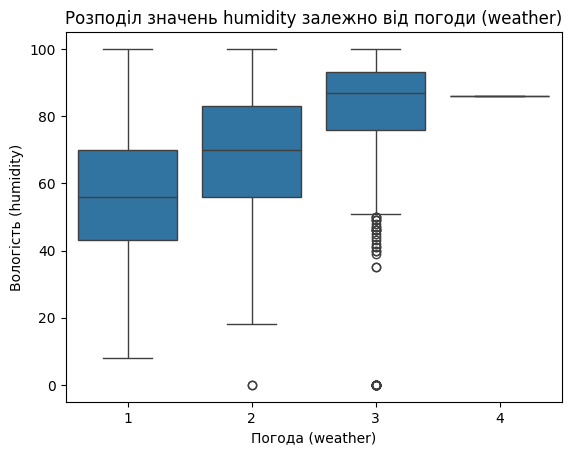

In [12]:
# Побудова box plot

sns.boxplot(x='weather', y='humidity', data=df)

# Додамо заголовок та підписи осей
plt.title('Розподіл значень humidity залежно від погоди (weather)')
plt.xlabel('Погода (weather)')
plt.ylabel('Вологість (humidity)');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

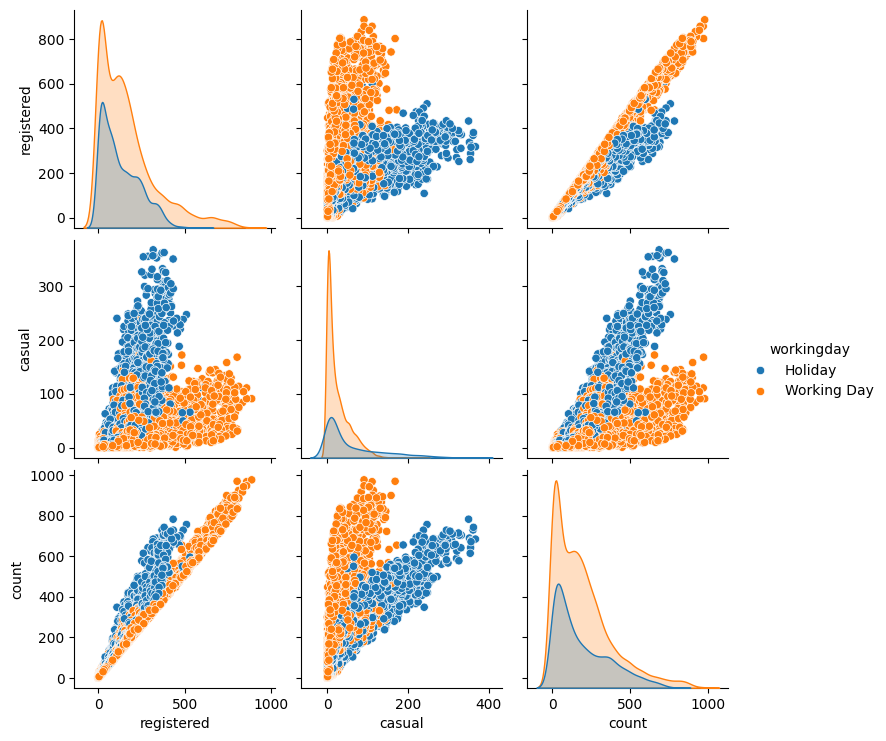

In [17]:
# Відфільтруємо потрібні колонки
filtered_data = df[['registered', 'casual', 'count', 'workingday']]

# Перетворимо колонку 'workingday' на категорійну для кольорової індикації
filtered_data['workingday'] = filtered_data['workingday'].map({0: 'Holiday', 1: 'Working Day'})

# Створення парних графіків
sns.pairplot(filtered_data, hue='workingday');

1. Загальна кількість прокатів (count):

У робочі дні (помаранчеві точки) кількість прокатів має тенденцію до більш високих значень. Це може бути пов'язано з тим, що більше зареєстрованих користувачів (registered) використовують велосипеди для поїздок на роботу або навчання.
У святкові дні (сині точки) кількість прокатів частіше нижча, але є деяка концентрація користувачів, які беруть велосипеди неформально (casual).

2. Зареєстровані користувачі (registered):

Зареєстровані користувачі частіше використовують велосипеди у робочі дні. Виходячи з графіків, кількість зареєстрованих користувачів у робочі дні є вищою порівняно зі святковими. Це очікувано, оскільки зареєстровані користувачі, ймовірно, використовують велосипеди як основний транспорт для повсякденних поїздок.

3. Неформальні користувачі (casual):

Неформальні користувачі більш активно використовують велосипеди у святкові дні. Це видно з того, що сині точки на графіках casual мають більшу концентрацію в святкові дні. Це може свідчити про те, що люди більше використовують велосипеди для розваг чи відпочинку у вільний час.

4. Взаємозв'язок між casual і count:

Є помітний лінійний зв'язок між кількістю неформальних користувачів та загальною кількістю прокатів у святкові дні. Це означає, що у святкові дні неформальні користувачі значно впливають на загальну кількість прокатів.

5. Взаємозв'язок між registered і count:

У робочі дні є сильний лінійний зв'язок між кількістю зареєстрованих користувачів і загальною кількістю прокатів. Це вказує на те, що зареєстровані користувачі є основною групою користувачів у будні дні.

**Висновок:**
У святкові дні спостерігається підвищена активність неформальних користувачів, що свідчить про те, що велосипеди частіше використовуються для відпочинку чи прогулянок.
У робочі дні основний акцент робиться на зареєстрованих користувачах, які частіше використовують велосипеди для регулярних поїздок.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [20]:
df['date'] = df.datetime.dt.date

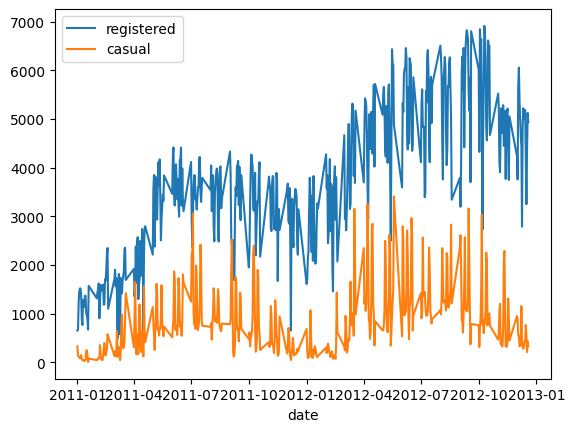

In [27]:
# Створимо нову змінну df_viz, яка містить лише потрібні колонки
df_viz = df[['date','registered' ,'casual']]

# Групуємо дані за колонкою 'date'
df_viz = df_viz.groupby('date').sum().reset_index()

df_viz.plot(x='date', y=['registered', 'casual']);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
